In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.shape

(4177, 9)

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
#Label encoding 'Sex'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<AxesSubplot:xlabel='Sex', ylabel='count'>

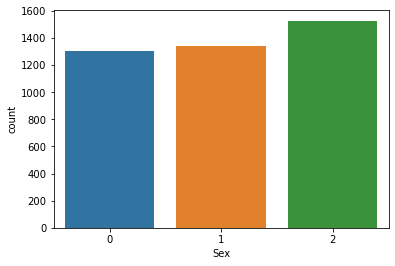

In [11]:
# here we see 0 is f, 1 is is I , 2 is M
sns.countplot(df['Sex'])

In [12]:
df.keys()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

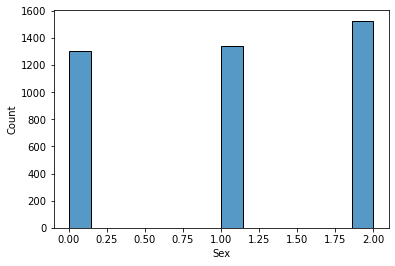

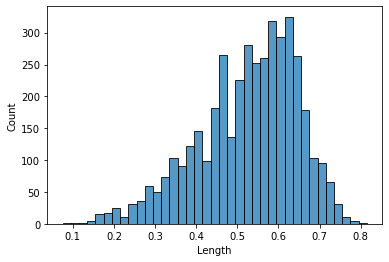

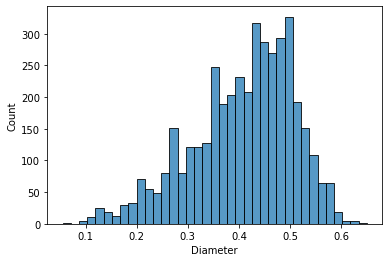

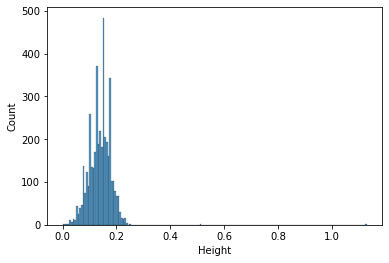

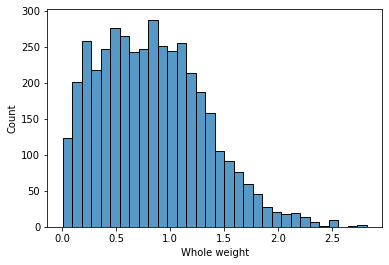

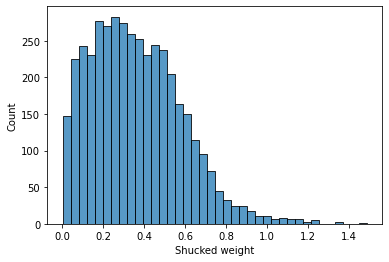

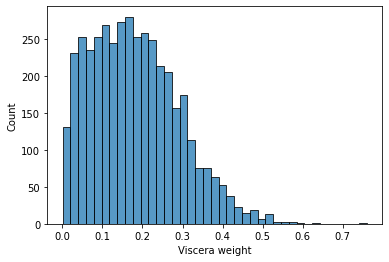

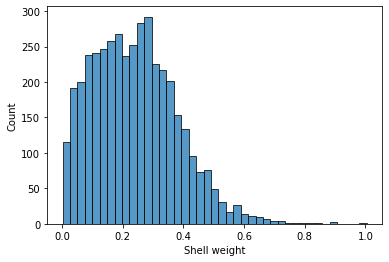

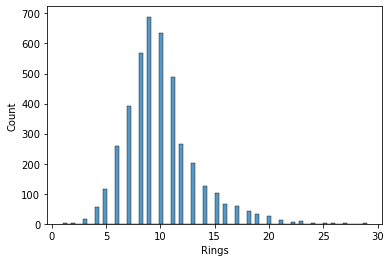

In [13]:
col = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
for i in col:
    plt.figure()
    sns.histplot(df[i])

In [14]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [15]:
# There we not seen skewness but in hight we have skewness
#Rings is a outplut variable 

In [16]:
df_corr= df.corr()
df_corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

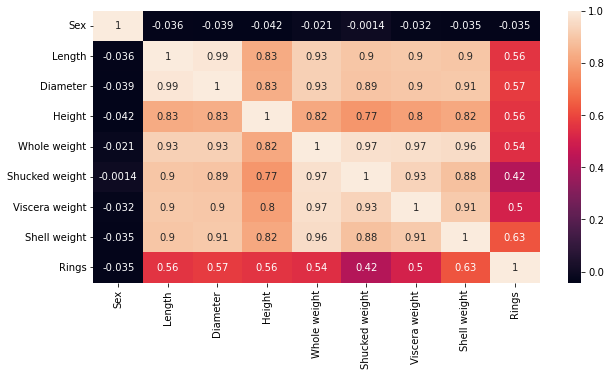

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot=True)

<Figure size 720x360 with 0 Axes>

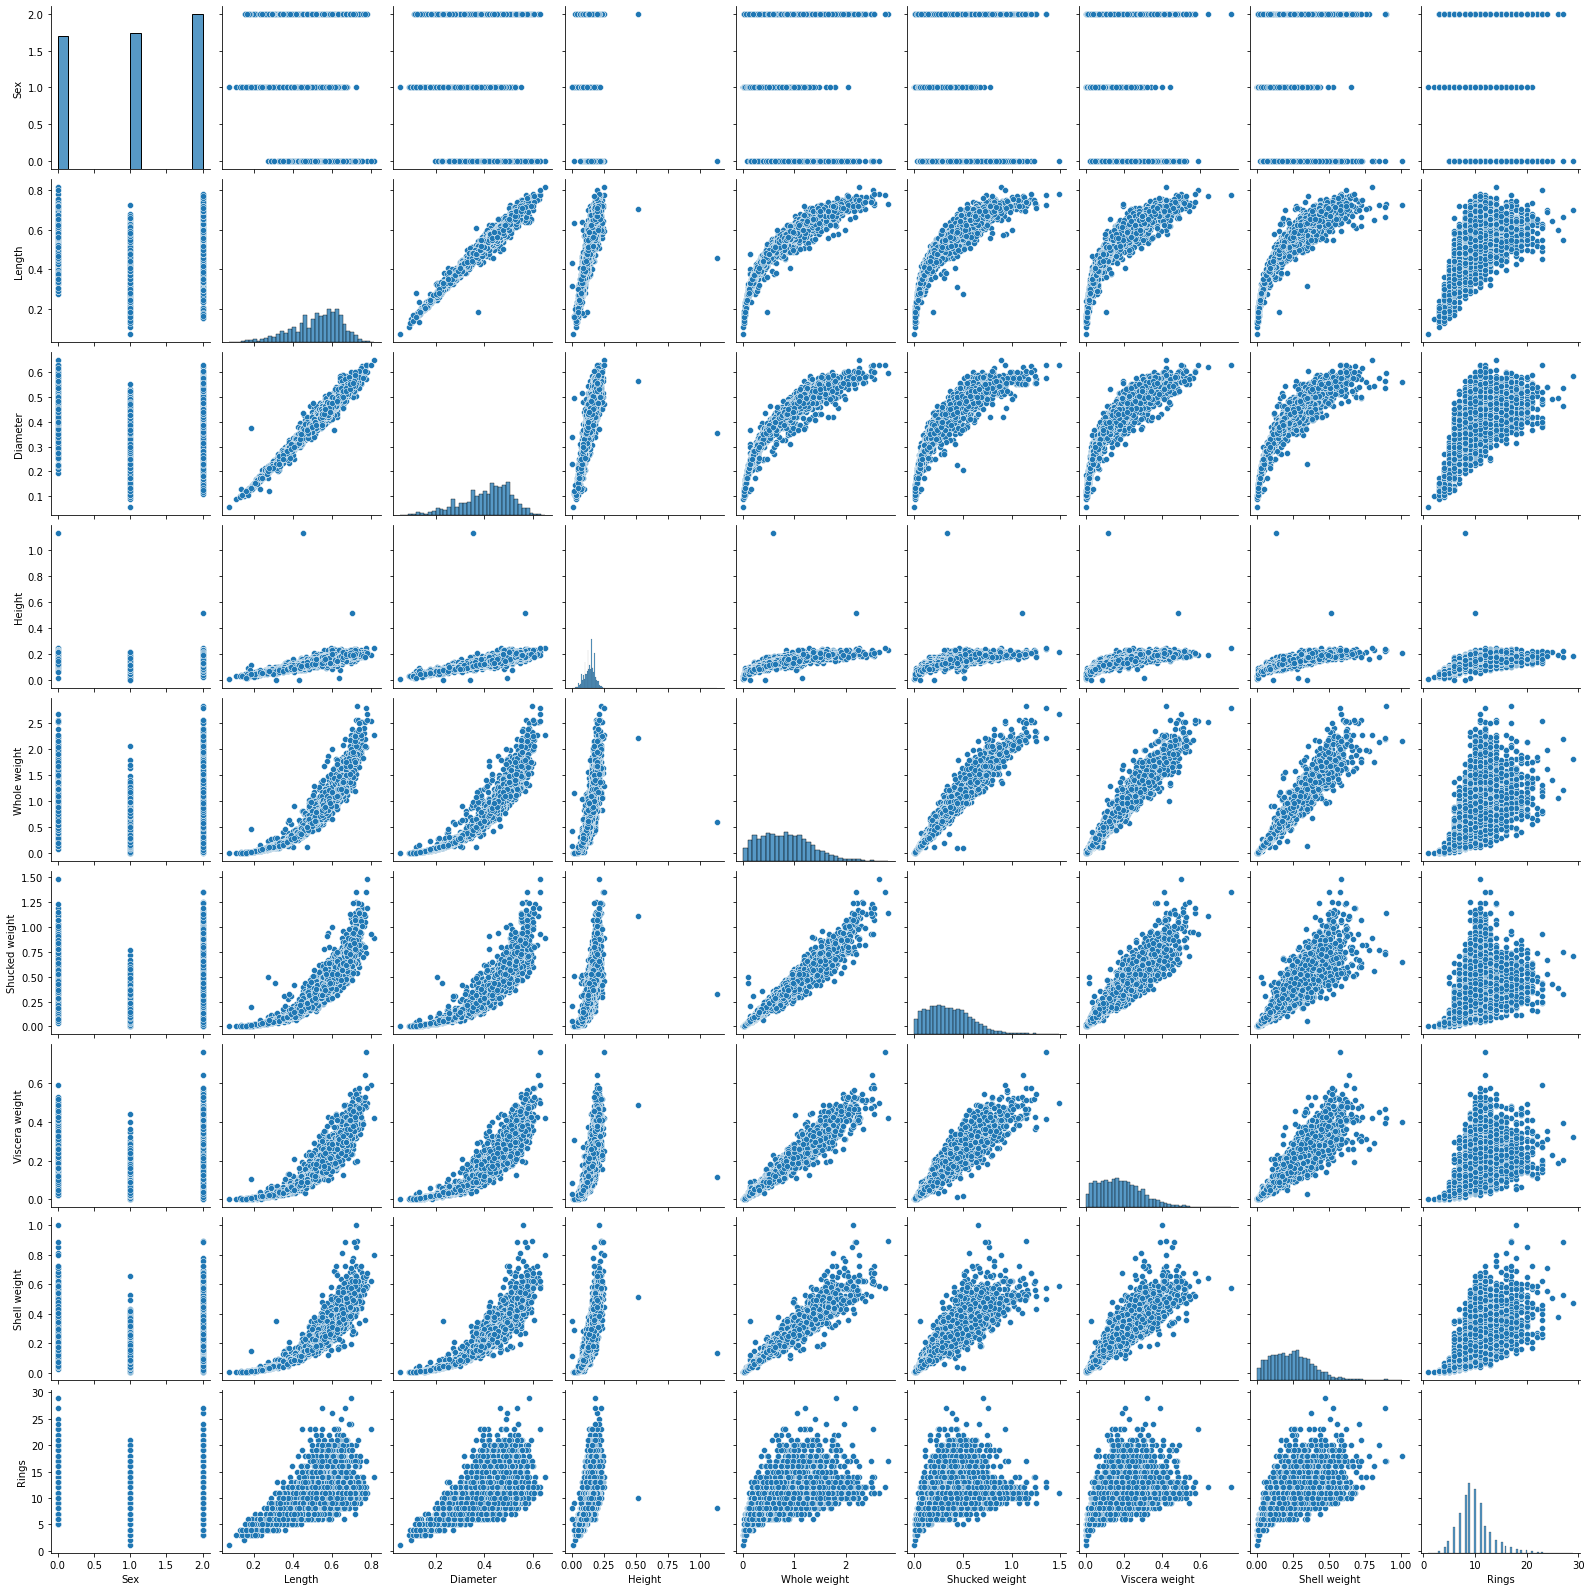

In [19]:
# we seen correaltion in dataset ,so we will plot pairplot
plt.figure(figsize=(10,5))
sns.pairplot(df)

In [20]:
df['Height'] = df['Height'].replace(0,df['Height'].mean())

In [34]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<function matplotlib.pyplot.show(close=None, block=None)>

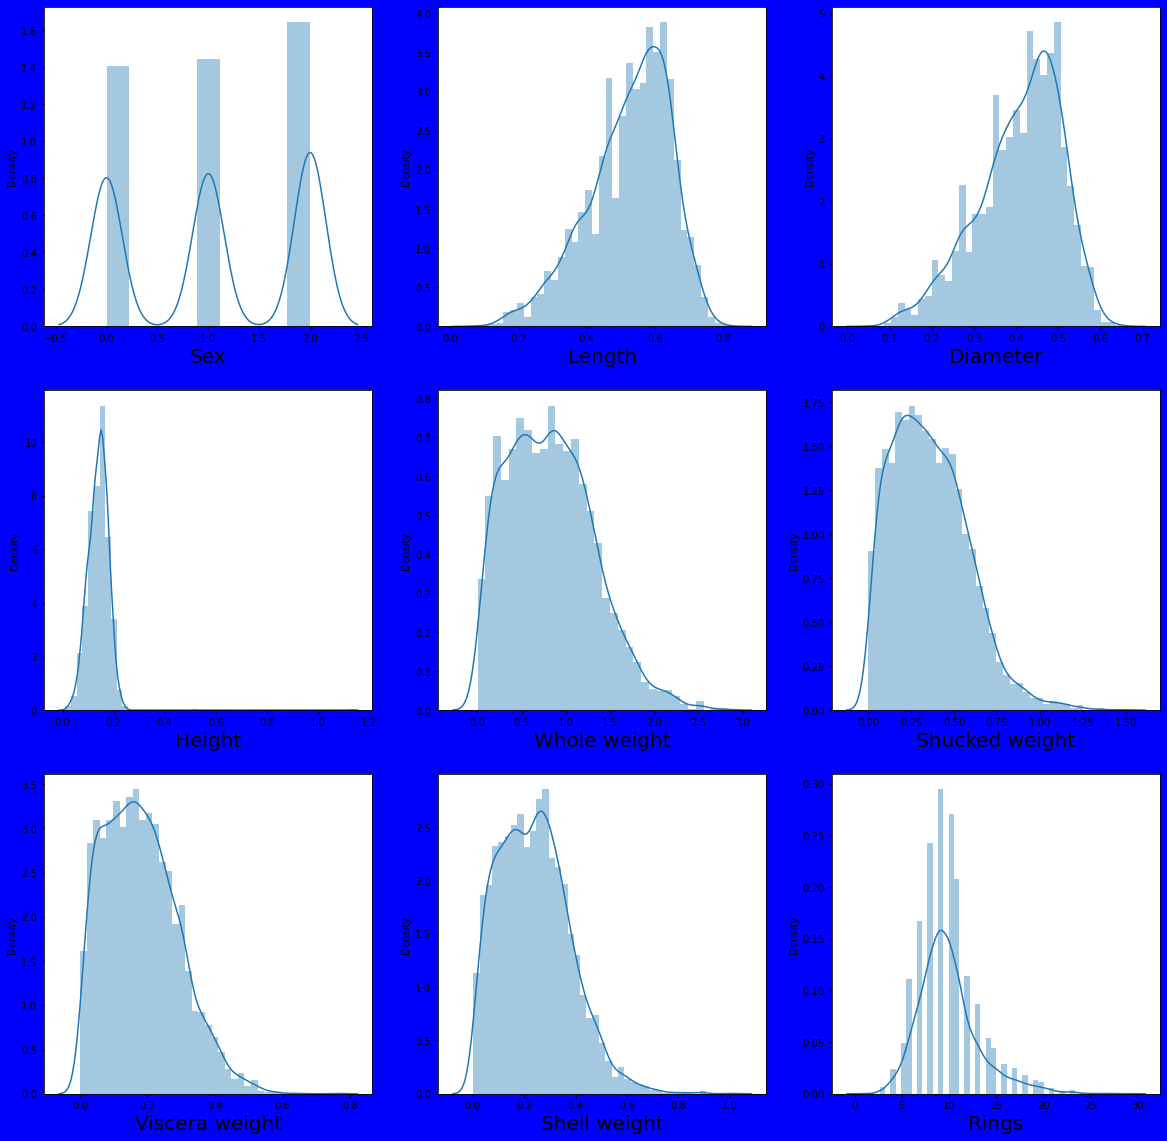

In [35]:
plt.figure(figsize=(20,20),facecolor='blue')
plotnumber =1
for column in df:
    if plotnumber <=9:
        ax =plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show    

In [36]:
df_feature =  df.drop('Rings',axis=1)
df_feature

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


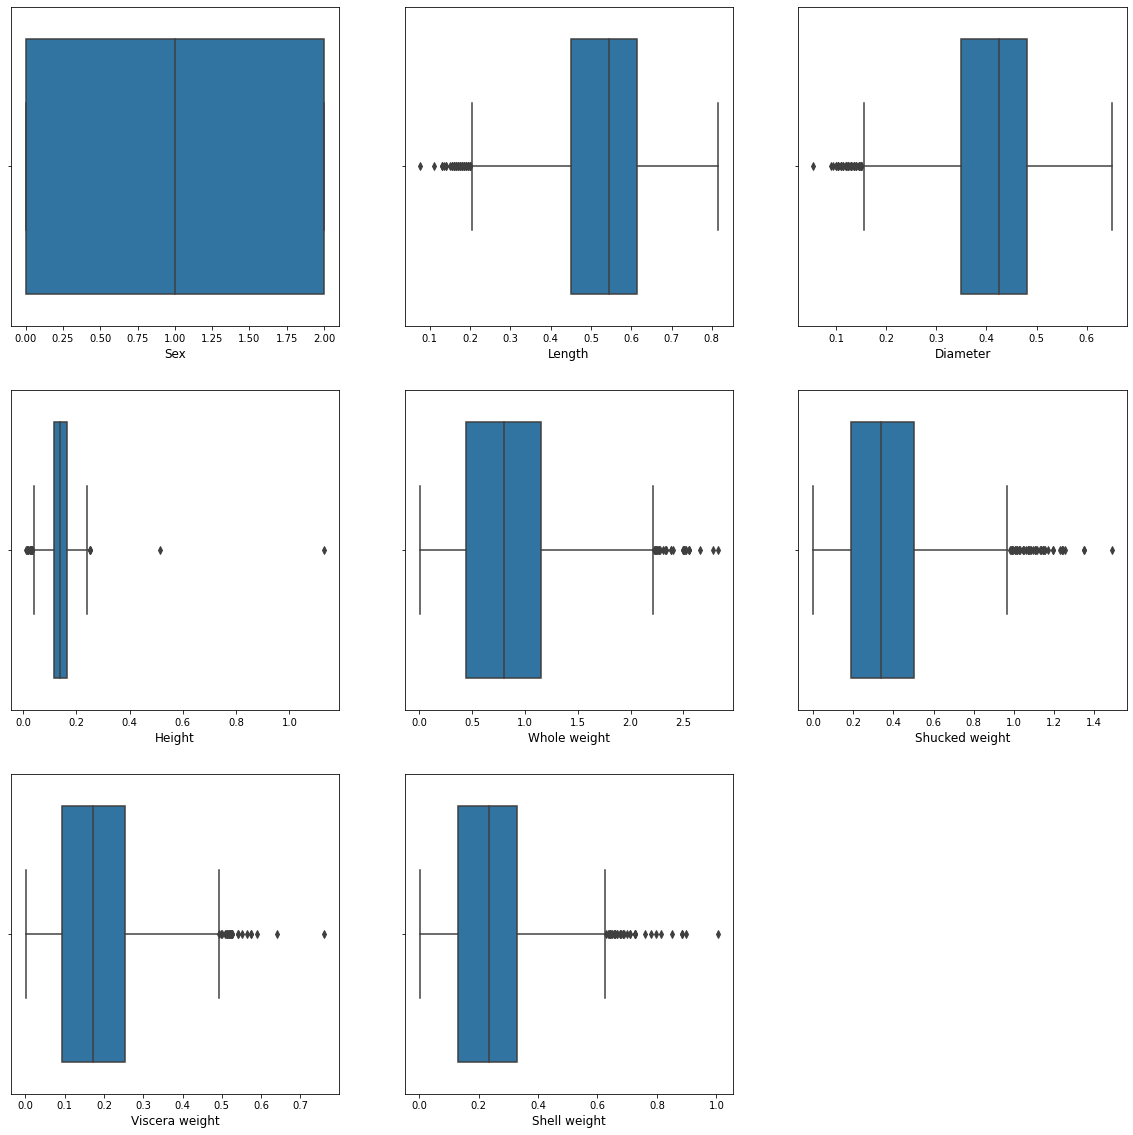

In [37]:
plt.figure(figsize=(20,20))
plotnumber = 1
for column in df_feature:
    if plotnumber <= 8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df_feature[column],orient='v')
        plt.xlabel(column,fontsize=12)
        plotnumber += 1
plt.show()        

In [78]:
df = df.rename(columns={'Whole weight' :'Whole_weight',
                                            'Shucked weight':'Shucked_weight',
                                            'Viscera weight': 'Viscera_weight',
                                            'Shell weight': 'Shell_weight'
    
                                           })
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [80]:
# using inter quantile range to remove outliears
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

Outlier Detection Formula:- Higher Side = Q3 + (1.5 IQR) Lower Side = Q1 - (1.5 IQR )

In [81]:
## removing outliers from Length column :-
length_lowerside =(q1.Length-(1.5 * iqr.Length))
length_lowerside

0.21500000000000005

In [82]:
## Finding index of that data which are less than .2025:-
index =np.where(df['Length'] <  length_lowerside)
index

(array([ 531,  762, 1499, 2152, 3092, 3742], dtype=int64),)

In [83]:
## Dropping that data which are  supposed to be outliers:-
df = df.drop(df.index[index])
df.shape

(4108, 9)

In [84]:
# Removing outliers from Diameter:-
Diameter_lowerside = (q1.Diameter-(1.5 * iqr.Diameter))
Diameter_lowerside

0.15499999999999997

In [85]:
## Finding index of that data which are less than .0.1549:-
index =np.where(df['Diameter'] <  Diameter_lowerside)
index

(array([], dtype=int64),)

In [86]:
# Dropping that data which are  supposed to be outliers:-
df = df.drop(df.index[index])
df.shape

(4108, 9)

In [87]:
## Removing outliers from Height:
height_lowerside = (q1.Height-(1.5 * iqr.Height))
height_lowerside

0.039999999999999994

In [88]:
## Finding index of that data which are less than 0.03999:-

index =np.where(df['Height'] <  height_lowerside)
index

(array([], dtype=int64),)

In [89]:
## Dropping that data which are  supposed to be outliers:-
df= df.drop(df.index[index])
df.shape

(4108, 9)

In [90]:
## Removing outliers from Whole_weight:-
whole_weight_high = (q3.Whole_weight +(1.5 * iqr.Whole_weight))
whole_weight_high

2.2191875000000003

In [95]:
# Finding index of that data which are Greater than 2.2202:-

index =np.where(df['Whole_weight'] >  whole_weight_high)
index

(array([ 161,  347,  867, 1025, 1026, 1161, 1174, 1175, 1177, 1393, 1394,
        1395, 1726, 1727, 1728, 2220, 2289, 2572, 2573, 2758, 2809, 2810,
        2954, 2955, 3132, 3368, 3537, 3652, 3736, 3925], dtype=int64),)

In [96]:
### Dropping that data which are  supposed to be outliers:-
df = df.drop(df.index[index])
df.shape

(4078, 9)

In [97]:
 #3Removing outliers from Shucked_weight:-
shucked_weight_high = (q3.Shucked_weight +(1.5 * iqr.Shucked_weight))
shucked_weight_high

0.9757499999999999

In [98]:
index = np.where(df['Shucked_weight'] > shucked_weight_high)
index

(array([1019, 1159, 1161, 1164, 1375, 1376, 1481, 1482, 1702, 1703, 1707,
        1709, 1771, 1931, 2477, 2555, 2605, 2640, 2738, 2895, 2897, 3005,
        3623, 3864, 3865], dtype=int64),)

In [99]:
df = df.drop(df.index[index])
df.shape

(4053, 9)

In [100]:
## Removing outliers from  Viscera weight:-
Viscera_weight_high = (q3.Viscera_weight +(1.5 * iqr.Viscera_weight))
Viscera_weight_high

0.49175

In [105]:
index = np.where(df['Viscera_weight'] > Viscera_weight_high)
index

(array([ 165, 1162, 1374, 1698, 1700, 2092, 2622, 3516, 4024], dtype=int64),)

In [106]:
df = df.drop(df.index[index])
df.shape

(4044, 9)

In [107]:
shell_weight_high = (q3.Shell_weight +(1.5 * iqr.Shell_weight))
shell_weight_high

0.6230625000000001

In [108]:
index =np.where(df['Shell_weight'] > shell_weight_high)
index

(array([  79,  127,  153,  159,  160,  161,  162,  163,  267,  321,  453,
        1755, 1915, 2017, 2035, 2082, 2086, 2128, 2193, 2285, 2870, 3039,
        3040, 3042, 3800, 4013], dtype=int64),)

In [109]:
df = df.drop(df.index[index])
df.shape

(4018, 9)

In [110]:
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4013,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4014,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4015,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4016,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:>

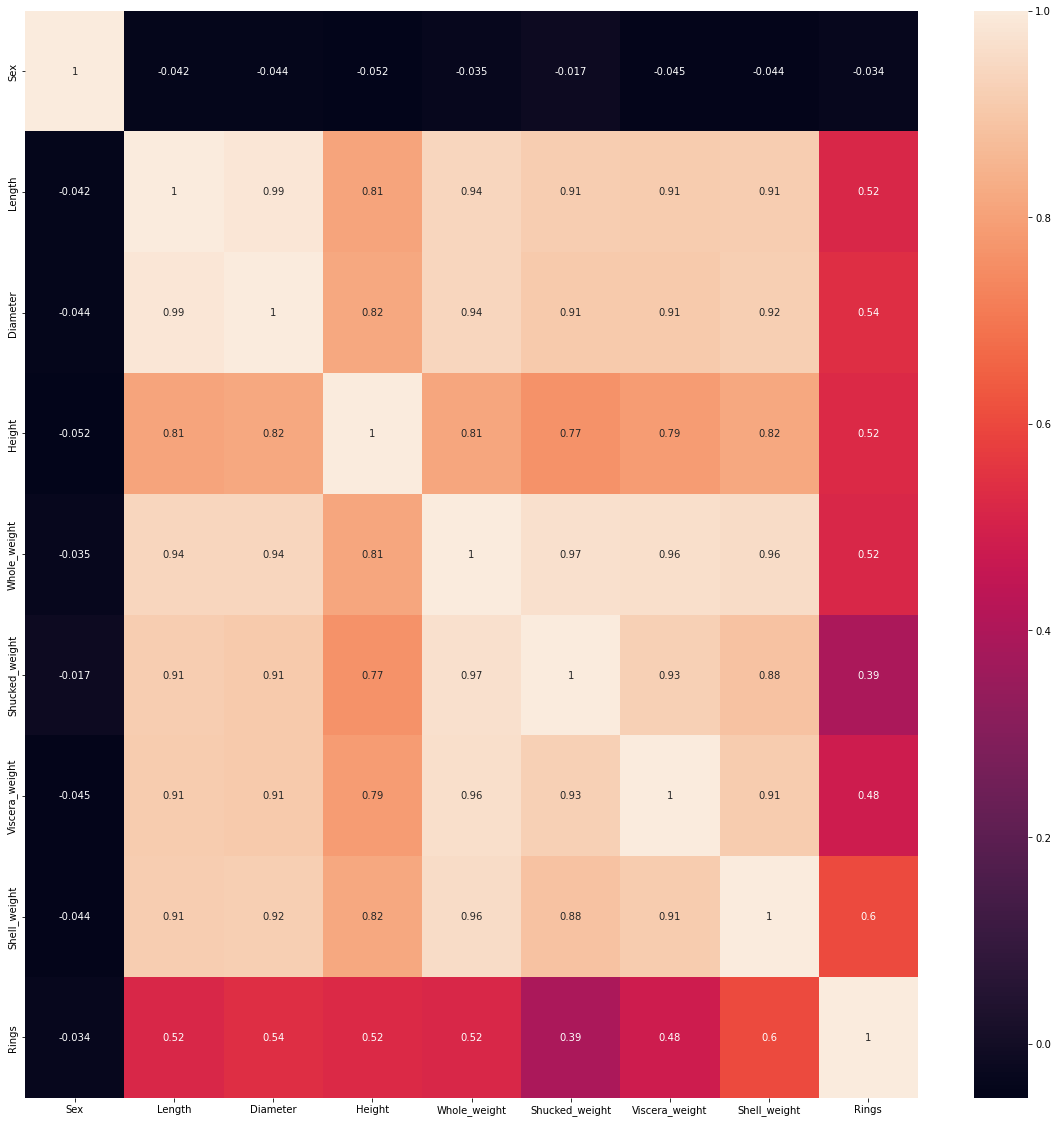

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

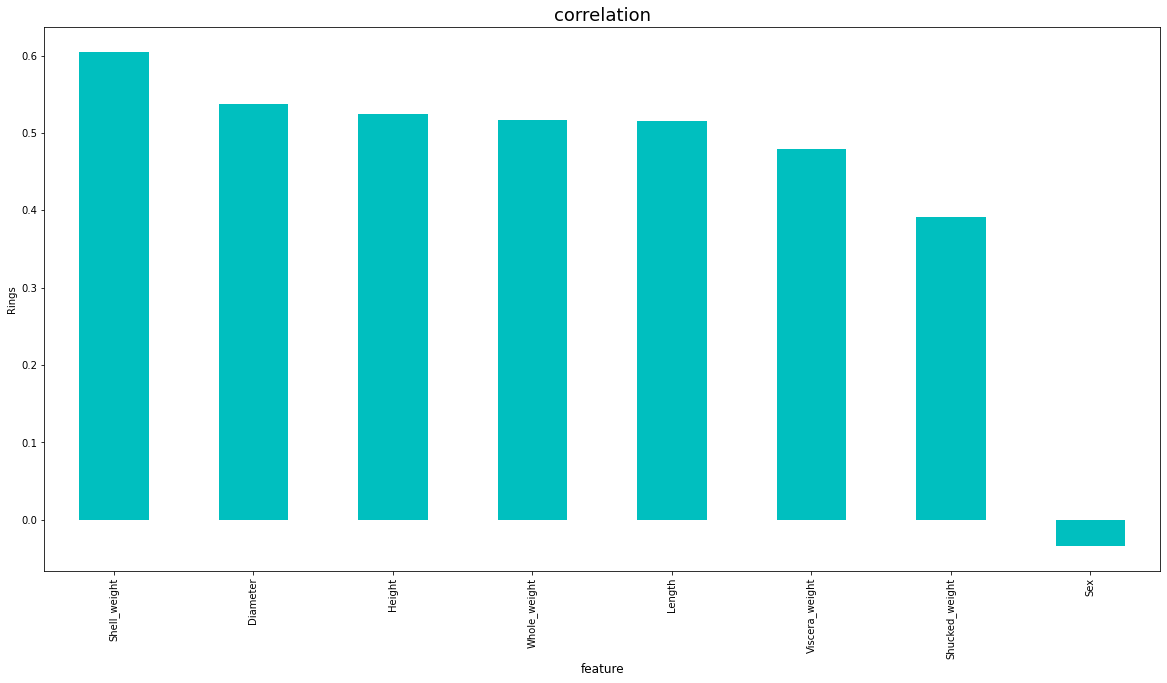

In [114]:
plt.figure(figsize=(20,10))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize='12')
plt.ylabel('Rings')
plt.title('correlation',fontsize=18)
plt.show()

In [115]:
df.skew()

Sex              -0.088743
Length           -0.528161
Diameter         -0.511647
Height            3.986529
Whole_weight      0.304487
Shucked_weight    0.428016
Viscera_weight    0.419698
Shell_weight      0.339003
Rings             1.213589
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

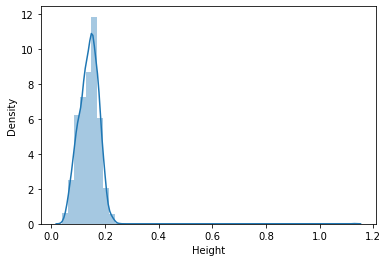

In [116]:
sns.distplot(df['Height'])

In [117]:
## now using square root method for treating positive skewness
df['Height'] = np.sqrt(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

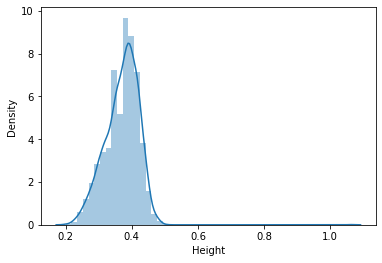

In [118]:
sns.distplot(df['Height'])

In [119]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960,10


In [120]:
df.shape

(4018, 9)

In [121]:
loss_percent= ((4177-4018)/4177) * 100
loss_percent

3.8065597318649753

In [123]:
features = df.drop('Rings',axis =1)
label = df['Rings']

In [124]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(features)

In [125]:
### Model Building :-
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

In [126]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(features,label,test_size = 0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At Random state {i} ,the train data accuracy is :- {r2_score(y_train,pred_train)} ")
    print(f"At Random state {i} ,the test data accuracy is :- {r2_score(y_test,pred_test)} ")
    print("\n")


At Random state 0 ,the train data accuracy is :- 0.5087009755341796 
At Random state 0 ,the test data accuracy is :- 0.5106712753693273 


At Random state 1 ,the train data accuracy is :- 0.5146384056275629 
At Random state 1 ,the test data accuracy is :- 0.48484534789486633 


At Random state 2 ,the train data accuracy is :- 0.5098684034296979 
At Random state 2 ,the test data accuracy is :- 0.505995655154303 


At Random state 3 ,the train data accuracy is :- 0.508854062999323 
At Random state 3 ,the test data accuracy is :- 0.5090994797526557 


At Random state 4 ,the train data accuracy is :- 0.5159955185791025 
At Random state 4 ,the test data accuracy is :- 0.48027452186262165 


At Random state 5 ,the train data accuracy is :- 0.5123533798365871 
At Random state 5 ,the test data accuracy is :- 0.4942552334560122 


At Random state 6 ,the train data accuracy is :- 0.5155419268819712 
At Random state 6 ,the test data accuracy is :- 0.4817096762416384 


At Random state 7 ,the trai

In [127]:
 x_train,x_test,y_train,y_test = train_test_split(features,label,test_size = 0.20,random_state=94)

In [128]:
lr.fit(x_train,y_train)

LinearRegression()

In [129]:
lr.fit(x_train,y_train)

LinearRegression()

In [130]:
print(r2_score(y_test,pred_test))

-0.5514879815080507


Cross Validation of the model:

In [131]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score = cross_val_score(lr,features,label,cv = i)
    cv_mean = cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean}")
    


At cross fold 2 the cv score is 0.49882902991715067
At cross fold 3 the cv score is 0.4755455494010805
At cross fold 4 the cv score is 0.37268402589484184
At cross fold 5 the cv score is 0.36711843203575095
At cross fold 6 the cv score is 0.374104961630332
At cross fold 7 the cv score is 0.4105309125909043
At cross fold 8 the cv score is 0.33225264281615685
At cross fold 9 the cv score is 0.38384249350431066


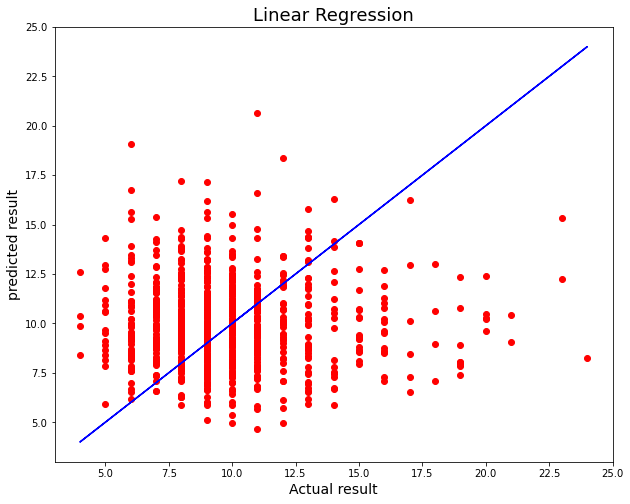

In [132]:
## Visualization through Scatter plot:-
plt.figure(figsize=(10,8))
plt.scatter(x = y_test,y = pred_test,color ='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual result',fontsize=14)
plt.ylabel('predicted result',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Regularization:

In [133]:
params ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
cvs =GridSearchCV(ls,params)
cvs.fit(x_train,y_train)
print(cvs.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [134]:
### providing best parameters:-
ls = Lasso(alpha=.0001,random_state = 0)
ls.fit(x_train,y_train)
predict_ls = ls.predict(x_test)

lss = r2_score(y_test,predict_ls)
lss

0.5211569367862703

In [135]:
## Cross Validation for Lasso
cv_score = cross_val_score(ls,features,label,cv=2)
cv_mean = cv_score.mean()
cv_mean

0.4989248179803563

Ensemble Technique:-

In [137]:
params ={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
cfr = GridSearchCV(rf,params)
cfr.fit(x_train,y_train)
print(cfr.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [138]:
rf =RandomForestRegressor(criterion = 'mse',max_features = 'log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf = rf.predict(x_test)

rfs = r2_score(y_test,pred_rf)
print('R2 score :' , rfs)
## Cross validation:
rfscore = cross_val_score(rf,features,label,cv =2)
cv_mean = rfscore.mean()
print('Cross Val Score :',cv_mean)

R2 score : 0.5219922664399343
Cross Val Score : 0.5113692799992562


Regularization using Ridge

In [139]:
#rc = RidgeCV( alphas = np.arange(.0001,.001,.01,1),normalize = True)
params ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rd = Ridge()
cvs =GridSearchCV(rd,params)
cvs.fit(x_train,y_train)
print(cvs.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [140]:
### providing best parameters:-
rd = Ridge(alpha=.1,random_state = 0)
rd.fit(x_train,y_train)
predict_rd = rd.predict(x_test)

score = r2_score(y_test,predict_rd)
score

0.5213304076317109

In [141]:
## Cross Validation for Ridge
cv_score = cross_val_score(rd,features,label,cv=2)
cv_mean = cv_score.mean()
cv_mean

0.5007681514856162

So we can see Model is not overfitting.

In [142]:
### Using Decision Tree Regressor for model building:-
param =  {'criterion':['mse','mae'],
          'max_depth':range(2,10),
          'min_samples_leaf':range(2,10),
          'min_samples_split':range(3,10)
    
          }
dtr = DecisionTreeRegressor()
grid_search = GridSearchCV(dtr,param)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [143]:
## Providing best parameters to Decision Tree:-
dtr = DecisionTreeRegressor(criterion = 'mse',max_depth = 6,min_samples_leaf=5,min_samples_split = 4)
dtr.fit(x_train,y_train)
predict_dtr = dtr.predict(x_test)
score = r2_score(y_test,predict_dtr)
score

0.4584859180553438

In [144]:
## Cross Validation to check overfitting:-
cv_score = cross_val_score(dtr,features,label,cv=2)
cv_mean = cv_score.mean()
cv_mean

0.40148798028047433

In [145]:
### using KNeighborsRegressor Model:-
params ={'n_neighbors' :[3,4,5,7] ,'algorithm':['auto','ball_tree','kd_tree','brute']}
knn = KNeighborsRegressor()
cfr = GridSearchCV(knn,params)
cfr.fit(x_train,y_train)
print(cfr.best_params_)

{'algorithm': 'auto', 'n_neighbors': 7}


In [146]:
## Providing best parameters to KNeighborsRegressor :-
knn = KNeighborsRegressor(n_neighbors=7,algorithm='auto')
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)
score = r2_score(y_test,predict_knn)
score

0.4802553757246546

In [147]:
# Cross Validation to check overfitting:-
cv_score = cross_val_score(knn,features,label,cv=2)
cv_mean = cv_score.mean()
cv_mean

0.46527341507938264

In [155]:
import pickle
filename = 'abalone case study'
pickle.dump(knn,open(filename,'wb'))